In [40]:
library(tidyverse)
library(cowplot)
library(ape)
library(patchwork)
library(png)
library(grid)
library(sf)
library(rnaturalearth)
library(rnaturalearthdata)
library(magick)
library(rgeos)
library(ggnewscale)
theme_set(theme_cowplot())
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 200)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_logical()
)

Parsed with column specification:
cols(
  pop_id = col_character(),
  species = col_character(),
  JRIAL_ID = col_character(),
  geo = col_character()
)

`summarise()` regrouping output by 'geo' (override with `.groups` argument)

Joining, by = "geo"

Warning message:
“Removed 100 rows containing missing values (position_stack).”


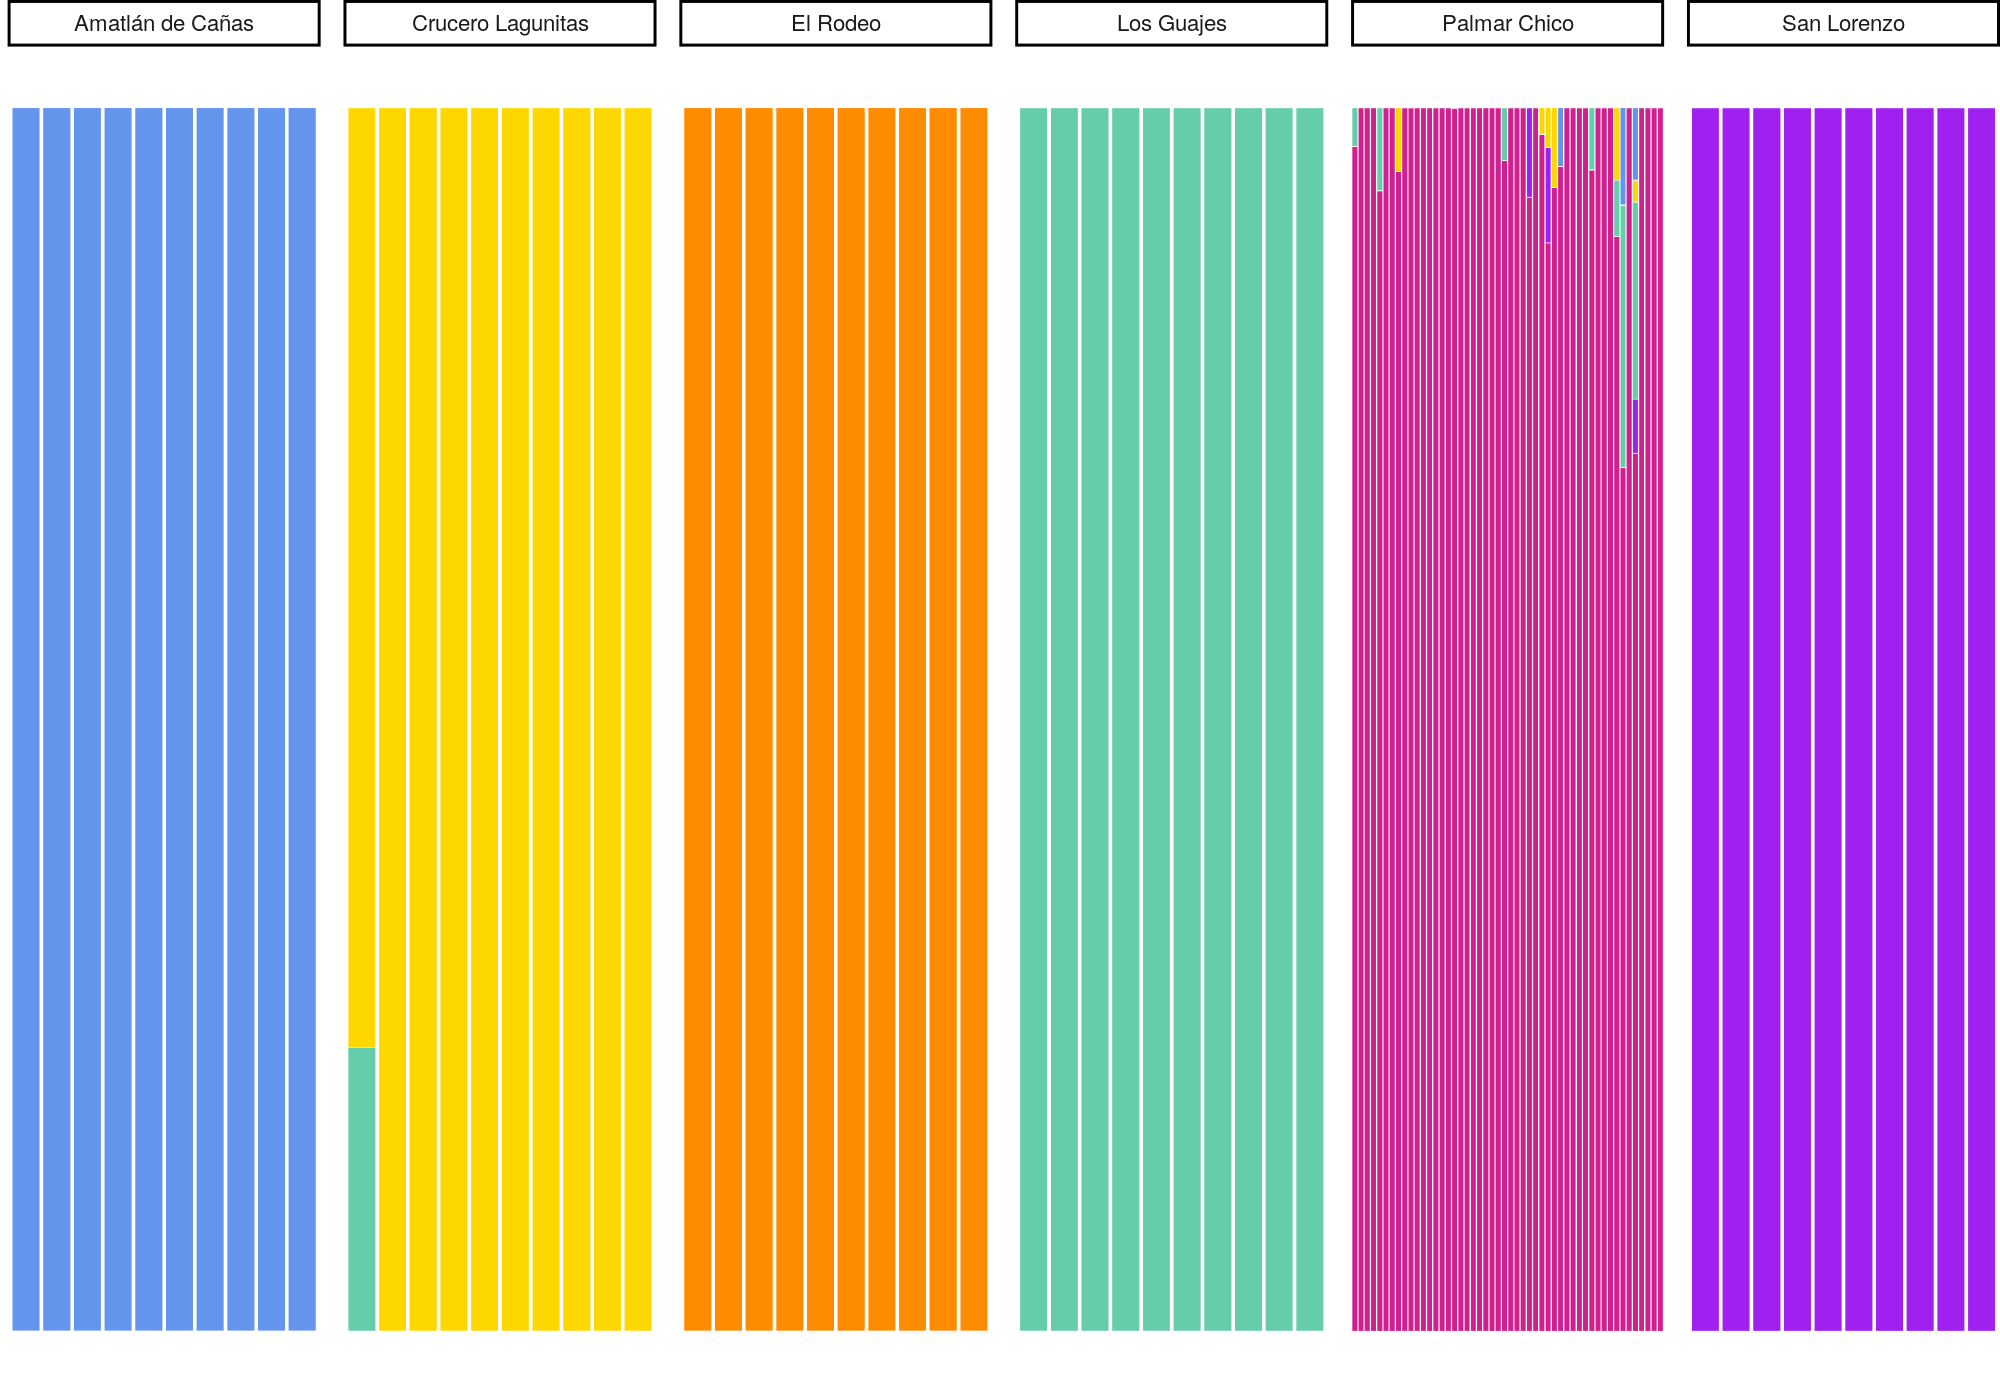

In [41]:
source("../color_df.R")

Q <- read_delim("../data/ngsAdmix/v5--Teo_K6.qopt", delim = " ", col_names = FALSE)
    
key <- read_delim("../pop_key", delim = "\t", col_names = TRUE) %>% 
    filter(species == "Teo", !grepl("random", geo)) %>% 
    select(JRIAL_ID, geo) %>% 
    distinct()

Q_df <- 
    bind_cols(Q, key) %>% 
    pivot_longer(cols = starts_with("X"), names_to = "bin", values_to = "prop") %>% 
    arrange(geo, desc(prop))


color_key <- 
full_join(
    color_df %>% 
    rename("geo" = "pop") %>% 
    mutate(geo = str_remove(geo, "LR_"),
           geo = str_remove(geo, "Teo_")
          ) %>%
    distinct(),
    
    Q_df %>% 
    group_by(geo, bin) %>%
    summarise(mean_p = mean(prop)) %>% 
    arrange(geo, desc(mean_p)) %>% 
    slice(1)
) %>% 
    select(-geo) %>% 
    drop_na()



Teo_structure_full <- 
Q_df %>%
    full_join(., color_key, by = "bin") %>% 
    mutate(geo = str_replace_all(geo, "_", " "), geo = str_replace_all(geo,"Amatlan de Canas","Amatlán de Cañas")) %>% 
    ggplot(aes(JRIAL_ID, prop, fill = color)) +
    geom_bar(position="stack", stat="identity", colour = "white", lwd = 0.1) +
    facet_wrap(~geo, scales = "free", nrow = 1) +
    theme_classic() +
    theme(
        strip.text.x = element_text(size = 8),
        legend.position = "n",
        line = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        plot.margin = margin(0, 0, 0, 0, "cm")
    ) + 
    scale_fill_identity()


Teo_structure_full

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_logical()
)

Parsed with column specification:
cols(
  pop_id = col_character(),
  species = col_character(),
  JRIAL_ID = col_character(),
  geo = col_character()
)

`summarise()` regrouping output by 'geo' (override with `.groups` argument)

Joining, by = "geo"



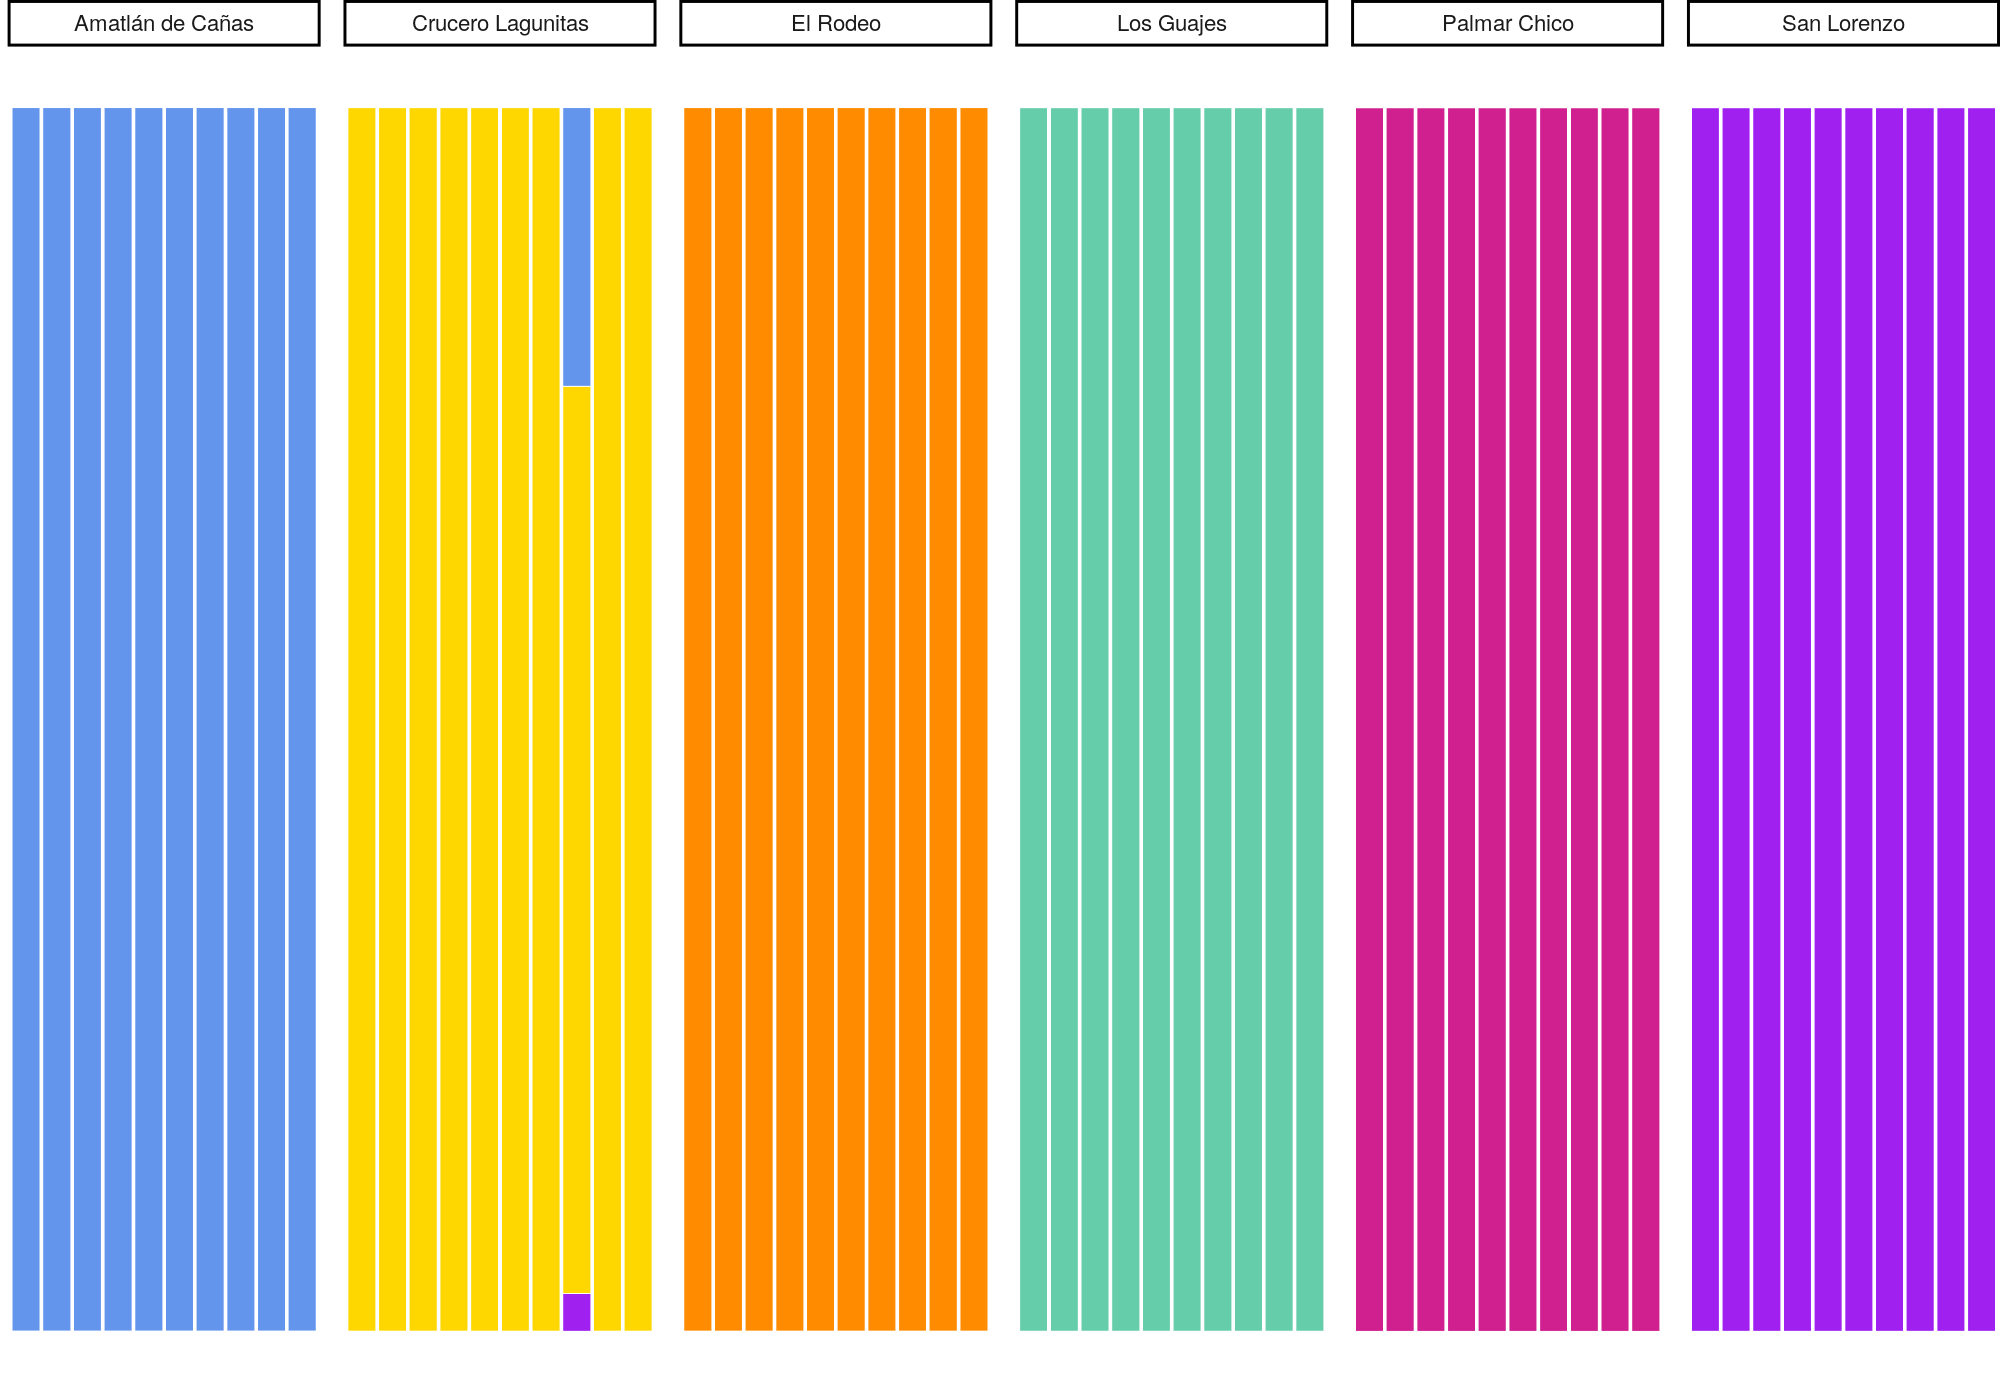

In [59]:
Q <- read_delim("../data/ngsAdmix/v5_Teo_6_thin1M_random10_PalmarChico.qopt", delim = " ", col_names = FALSE) %>% 
    select(-X7)

#barplot(t(Q), col = c("cornflowerblue", "gold",  "mediumaquamarine",  "purple", "violetred"))

source("../color_df.R")
  
key <- read_delim("../pop_key", delim = "\t", col_names = TRUE) %>% 
    filter(species == "Teo", !grepl("random", geo)) %>% 
    select(JRIAL_ID, geo) %>% 
    distinct() %>% 
    group_by(geo) %>% 
    sample_n(10, replace = FALSE)

Q_df <- 
    bind_cols(Q, key) %>% 
    pivot_longer(cols = starts_with("X"), names_to = "bin", values_to = "prop") %>% 
    arrange(geo, desc(prop))


color_key <- 
full_join(
    color_df %>% 
    rename("geo" = "pop") %>% 
    mutate(geo = str_remove(geo, "LR_"),
           geo = str_remove(geo, "Teo_")
          ) %>%
    distinct(),
    
    Q_df %>% 
    group_by(geo, bin) %>%
    summarise(mean_p = mean(prop)) %>% 
    arrange(geo, desc(mean_p)) %>% 
    slice(1)) %>% 
    select(-geo) %>% 
    drop_na()


Teo_structure_10 <- 
Q_df %>%
    full_join(., color_key, by = "bin") %>% 
    mutate(geo = str_replace_all(geo, "_", " "), geo = str_replace_all(geo,"Amatlan de Canas","Amatlán de Cañas")) %>% 
    #mutate(geo = str_replace_all(geo, "_", " "), geo = str_replace_all(geo,"Amatlan de Canas","Amatlán de Cañas"))  %>% 
    ggplot(aes(JRIAL_ID, prop, fill = color)) +
    geom_bar(position="stack", stat="identity", colour = "white", lwd = 0.1) +
    facet_wrap(~geo, scales = "free", nrow = 1) +
    theme_classic() +
    theme(
        strip.text.x = element_text(size = 8),
        legend.position = "n",
        line = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        plot.margin = margin(0, 0, 0, 0, "cm")
    ) +
    scale_fill_identity()

Teo_structure_10
#scale_fill_manual(values = c(X2 = "cornflowerblue", X1 = "gold", X5 = "mediumaquamarine", X4 = "purple", X3 = "violetred", X6 = "cyan", X7 = "dodgerblue"))


Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_logical()
)

Parsed with column specification:
cols(
  pop_id = col_character(),
  species = col_character(),
  JRIAL_ID = col_character(),
  geo = col_character()
)



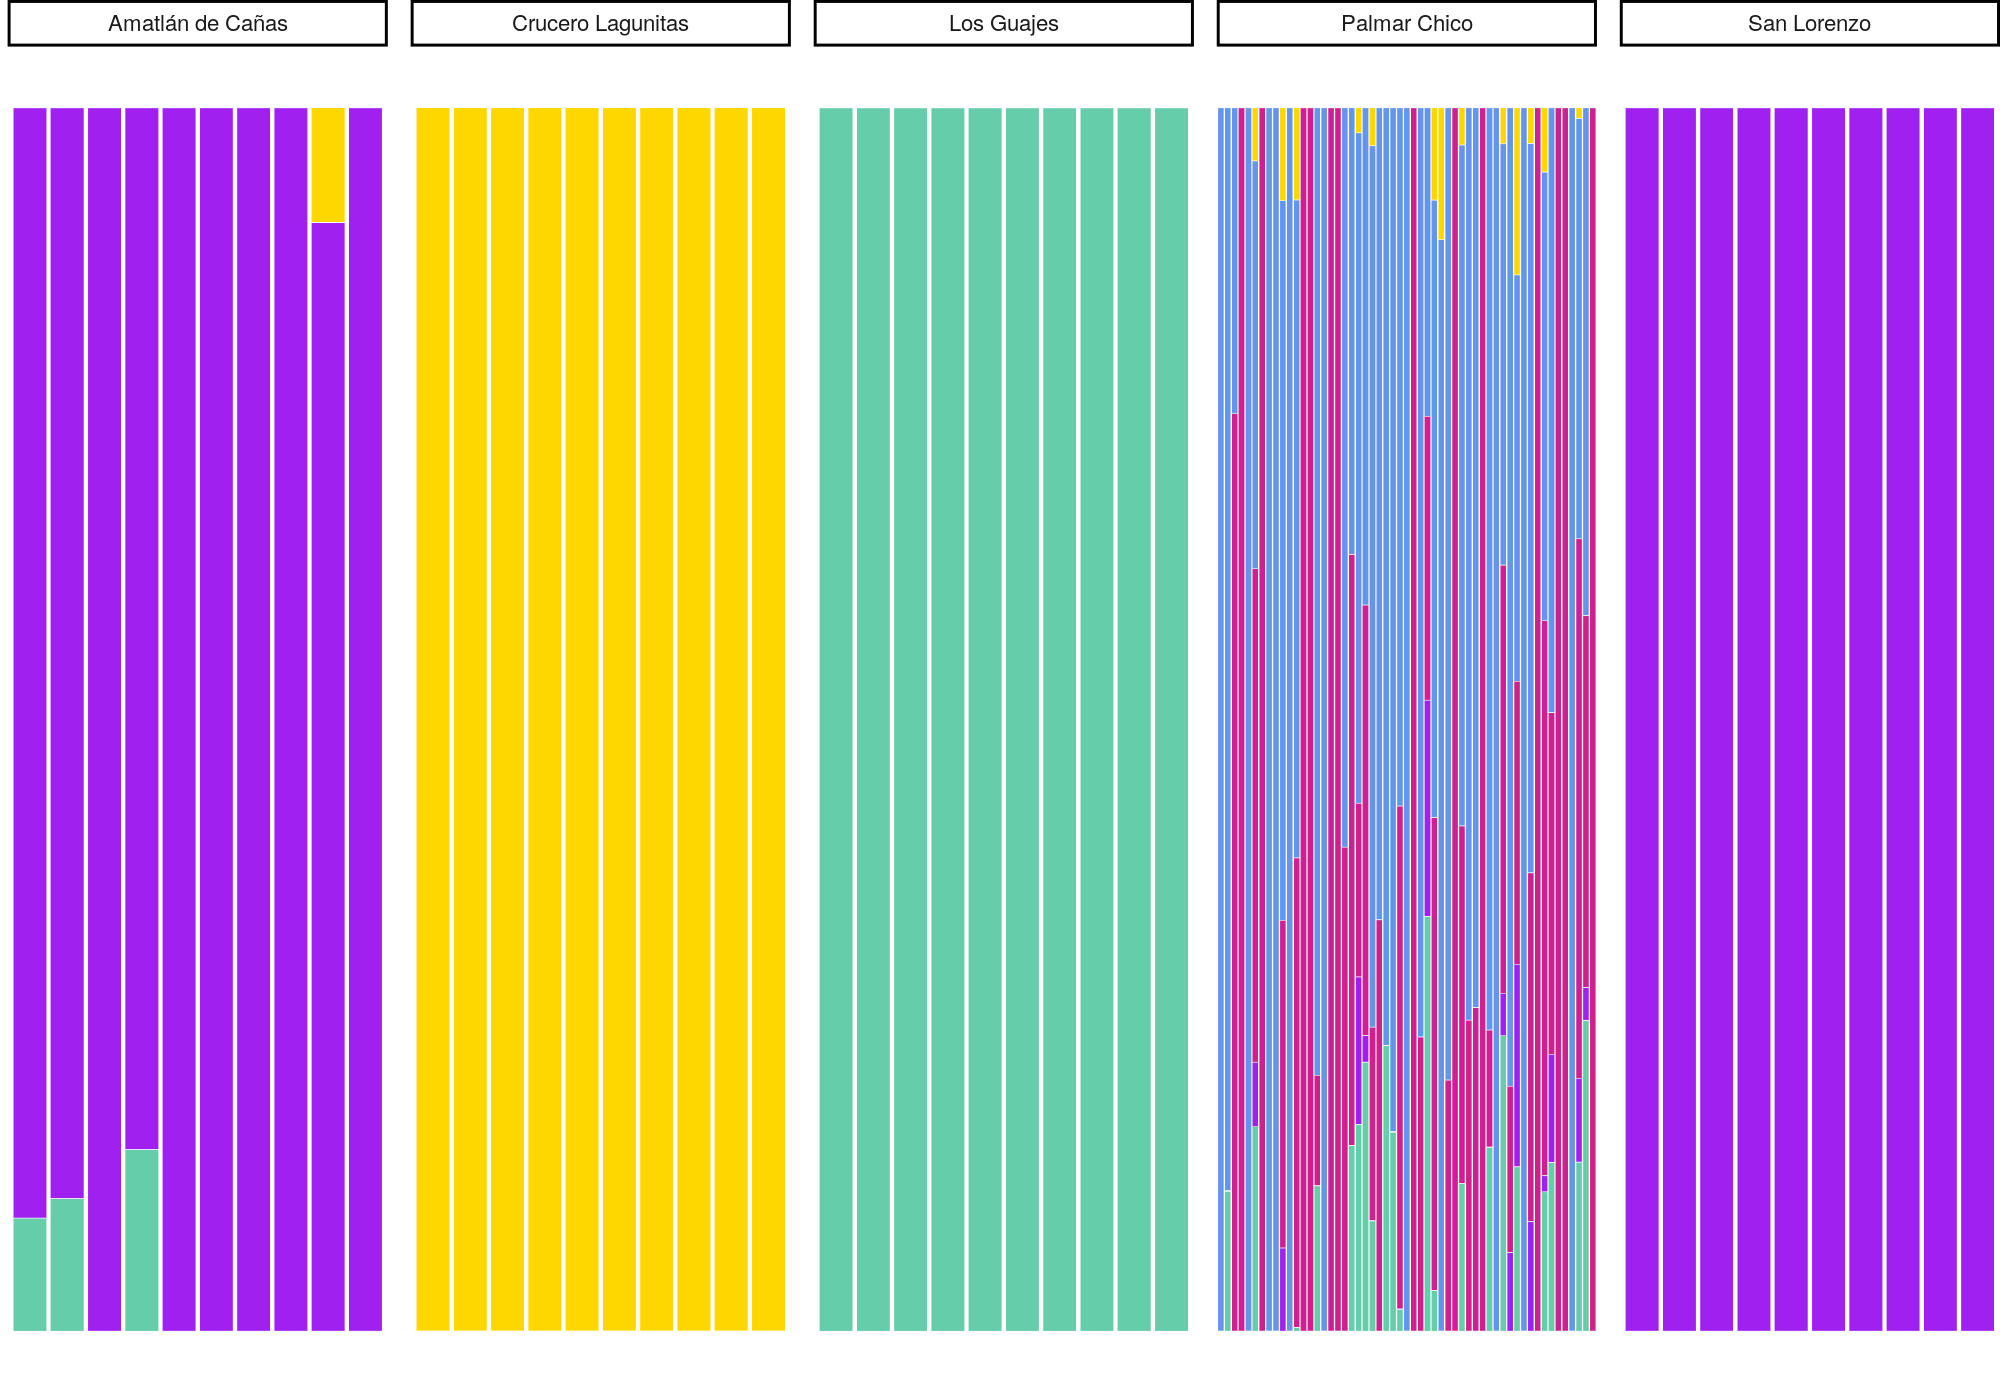

In [42]:
source("../color_df.R")

Q <- read_delim("../data/ngsAdmix/v5--LR_K5.qopt", delim = " ", col_names = FALSE)
    
key <- read_delim("../pop_key", delim = "\t", col_names = TRUE) %>% 
    filter(species == "LR", !grepl("random", geo)) %>% 
    select(JRIAL_ID, geo) %>% 
    distinct() %>% 
    drop_na()

Q_df <- 
    bind_cols(Q, key) %>% 
    pivot_longer(cols = starts_with("X"), names_to = "bin", values_to = "prop") %>% 
    arrange(geo, desc(prop))


LR_key  <- 
full_join(
tibble(
    geo = c("Amatlan_de_Canas", "Crucero_Lagunitas", "Los_Guajes", "San_Lorenzo", "Palmar_Chico"),
    bin = c("X2", "X1", "X5", "X4", "X3")
),
    color_df %>% 
    rename("geo" = "pop") %>% 
    mutate(geo = str_remove(geo, "LR_"),
           geo = str_remove(geo, "Teo_")
          ) %>%
    distinct(), by = "geo") %>% 
    drop_na()


LR_stucture_full <- 
Q_df %>%
    drop_na() %>% 
    mutate(geo = str_replace_all(geo, "_", " "), geo = str_replace_all(geo,"Amatlan de Canas","Amatlán de Cañas")) %>% 
    ggplot(aes(JRIAL_ID, prop, fill = bin)) +
    geom_bar(position="stack", stat="identity", colour = "white", lwd = 0.1) +
    facet_wrap(~geo, scales = "free", nrow = 1) +
    theme_classic() +
    theme(
        strip.text.x = element_text(size = 8),
        legend.position = "n",
        line = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        plot.margin = margin(0, 0, 0, 0, "cm")
    ) +
    scale_fill_manual(values = c(X2 = "cornflowerblue", X1 = "gold", X5 = "mediumaquamarine", X4 = "purple", X3 = "violetred", X6 = "cyan", X7 = "dodgerblue"))

LR_stucture_full

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_logical()
)

Parsed with column specification:
cols(
  pop_id = col_character(),
  species = col_character(),
  JRIAL_ID = col_character(),
  geo = col_character()
)

`summarise()` regrouping output by 'geo' (override with `.groups` argument)

Joining, by = "geo"



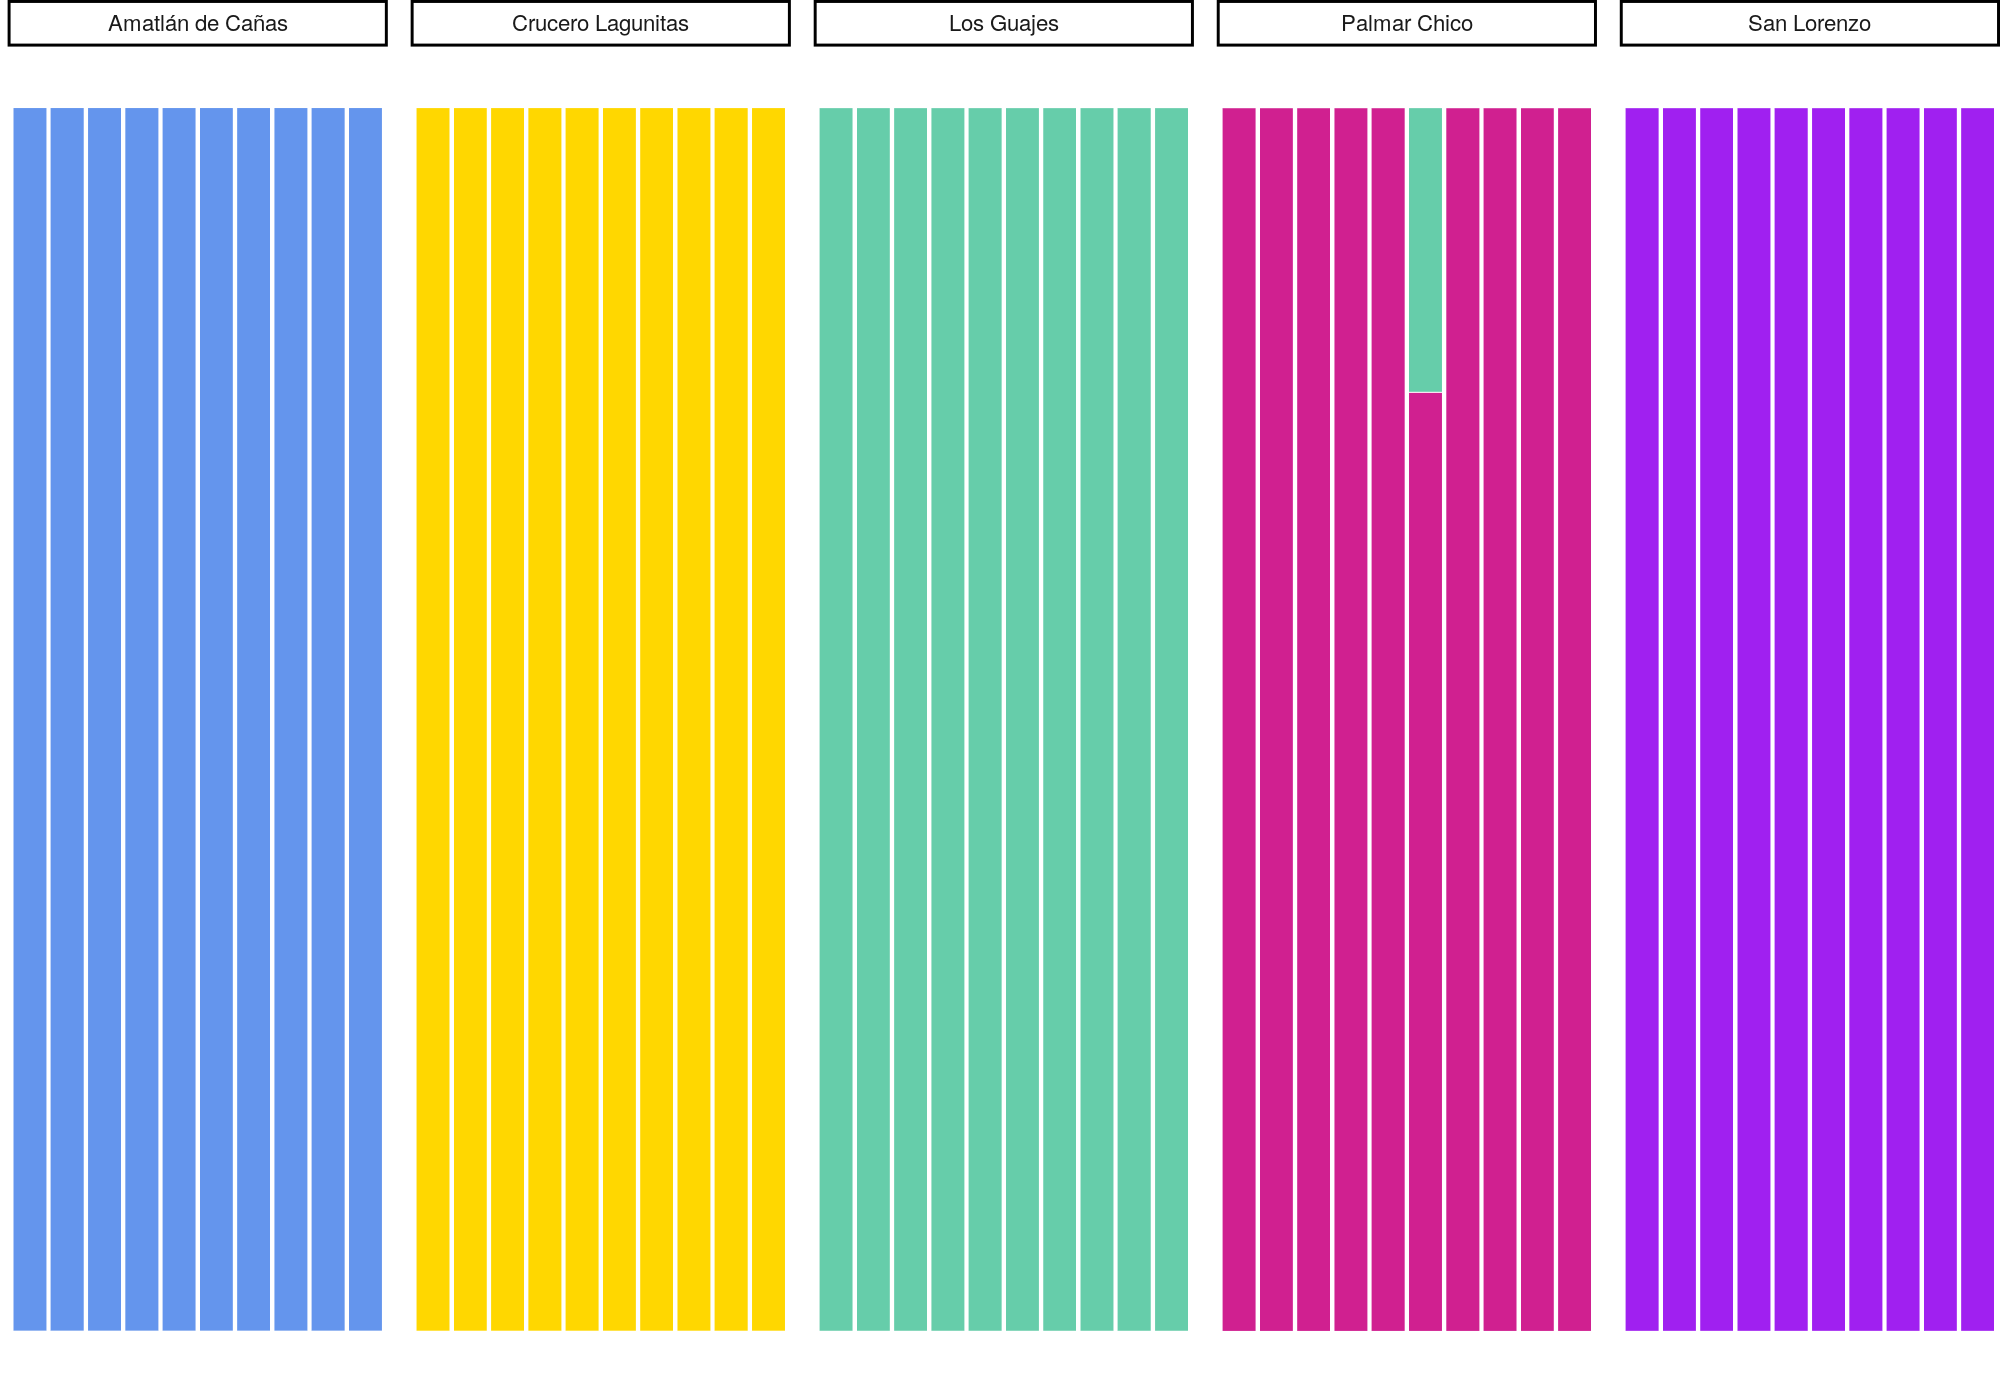

In [61]:
Q <- read_delim("../data/ngsAdmix/v5_LR_5_thin1M_random10_PalmarChico.qopt", delim = " ", col_names = FALSE) %>% 
    select(-X6)

#barplot(t(Q), col = c("cornflowerblue", "gold",  "mediumaquamarine",  "purple", "violetred"))

source("../color_df.R")
  
key <- read_delim("../pop_key", delim = "\t", col_names = TRUE) %>% 
    filter(species == "LR", !grepl("random", geo)) %>% 
    select(JRIAL_ID, geo) %>% 
    distinct() %>% 
    group_by(geo) %>% 
    sample_n(10, replace = FALSE)

Q_df <- 
    bind_cols(Q, key) %>% 
    pivot_longer(cols = starts_with("X"), names_to = "bin", values_to = "prop") %>% 
    arrange(geo, desc(prop))


color_key <- 
full_join(
    color_df %>% 
    rename("geo" = "pop") %>% 
    mutate(geo = str_remove(geo, "LR_"),
           geo = str_remove(geo, "Teo_")
          ) %>%
    distinct(),
    
    Q_df %>% 
    group_by(geo, bin) %>%
    summarise(mean_p = mean(prop)) %>% 
    arrange(geo, desc(mean_p)) %>% 
    slice(1)) %>% 
    select(-geo) %>% 
    drop_na()

LR_structure_10 <- 
Q_df %>%
    full_join(., color_key, by = "bin") %>% 
    mutate(geo = str_replace_all(geo, "_", " "), geo = str_replace_all(geo,"Amatlan de Canas","Amatlán de Cañas")) %>% 
    #mutate(geo = str_replace_all(geo, "_", " "), geo = str_replace_all(geo,"Amatlan de Canas","Amatlán de Cañas"))  %>% 
    ggplot(aes(JRIAL_ID, prop, fill = color)) +
    geom_bar(position="stack", stat="identity", colour = "white", lwd = 0.1) +
    facet_wrap(~geo, scales = "free", nrow = 1) +
    theme_classic() +
    theme(
        strip.text.x = element_text(size = 8),
        legend.position = "n",
        line = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        plot.margin = margin(0, 0, 0, 0, "cm")
    ) +
    scale_fill_identity()

LR_structure_10
#scale_fill_manual(values = c(X2 = "cornflowerblue", X1 = "gold", X5 = "mediumaquamarine", X4 = "purple", X3 = "violetred", X6 = "cyan", X7 = "dodgerblue"))

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_logical()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_logical()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_logical()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_logical()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_logical()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_logical()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_logical()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_logical()
)

Parse

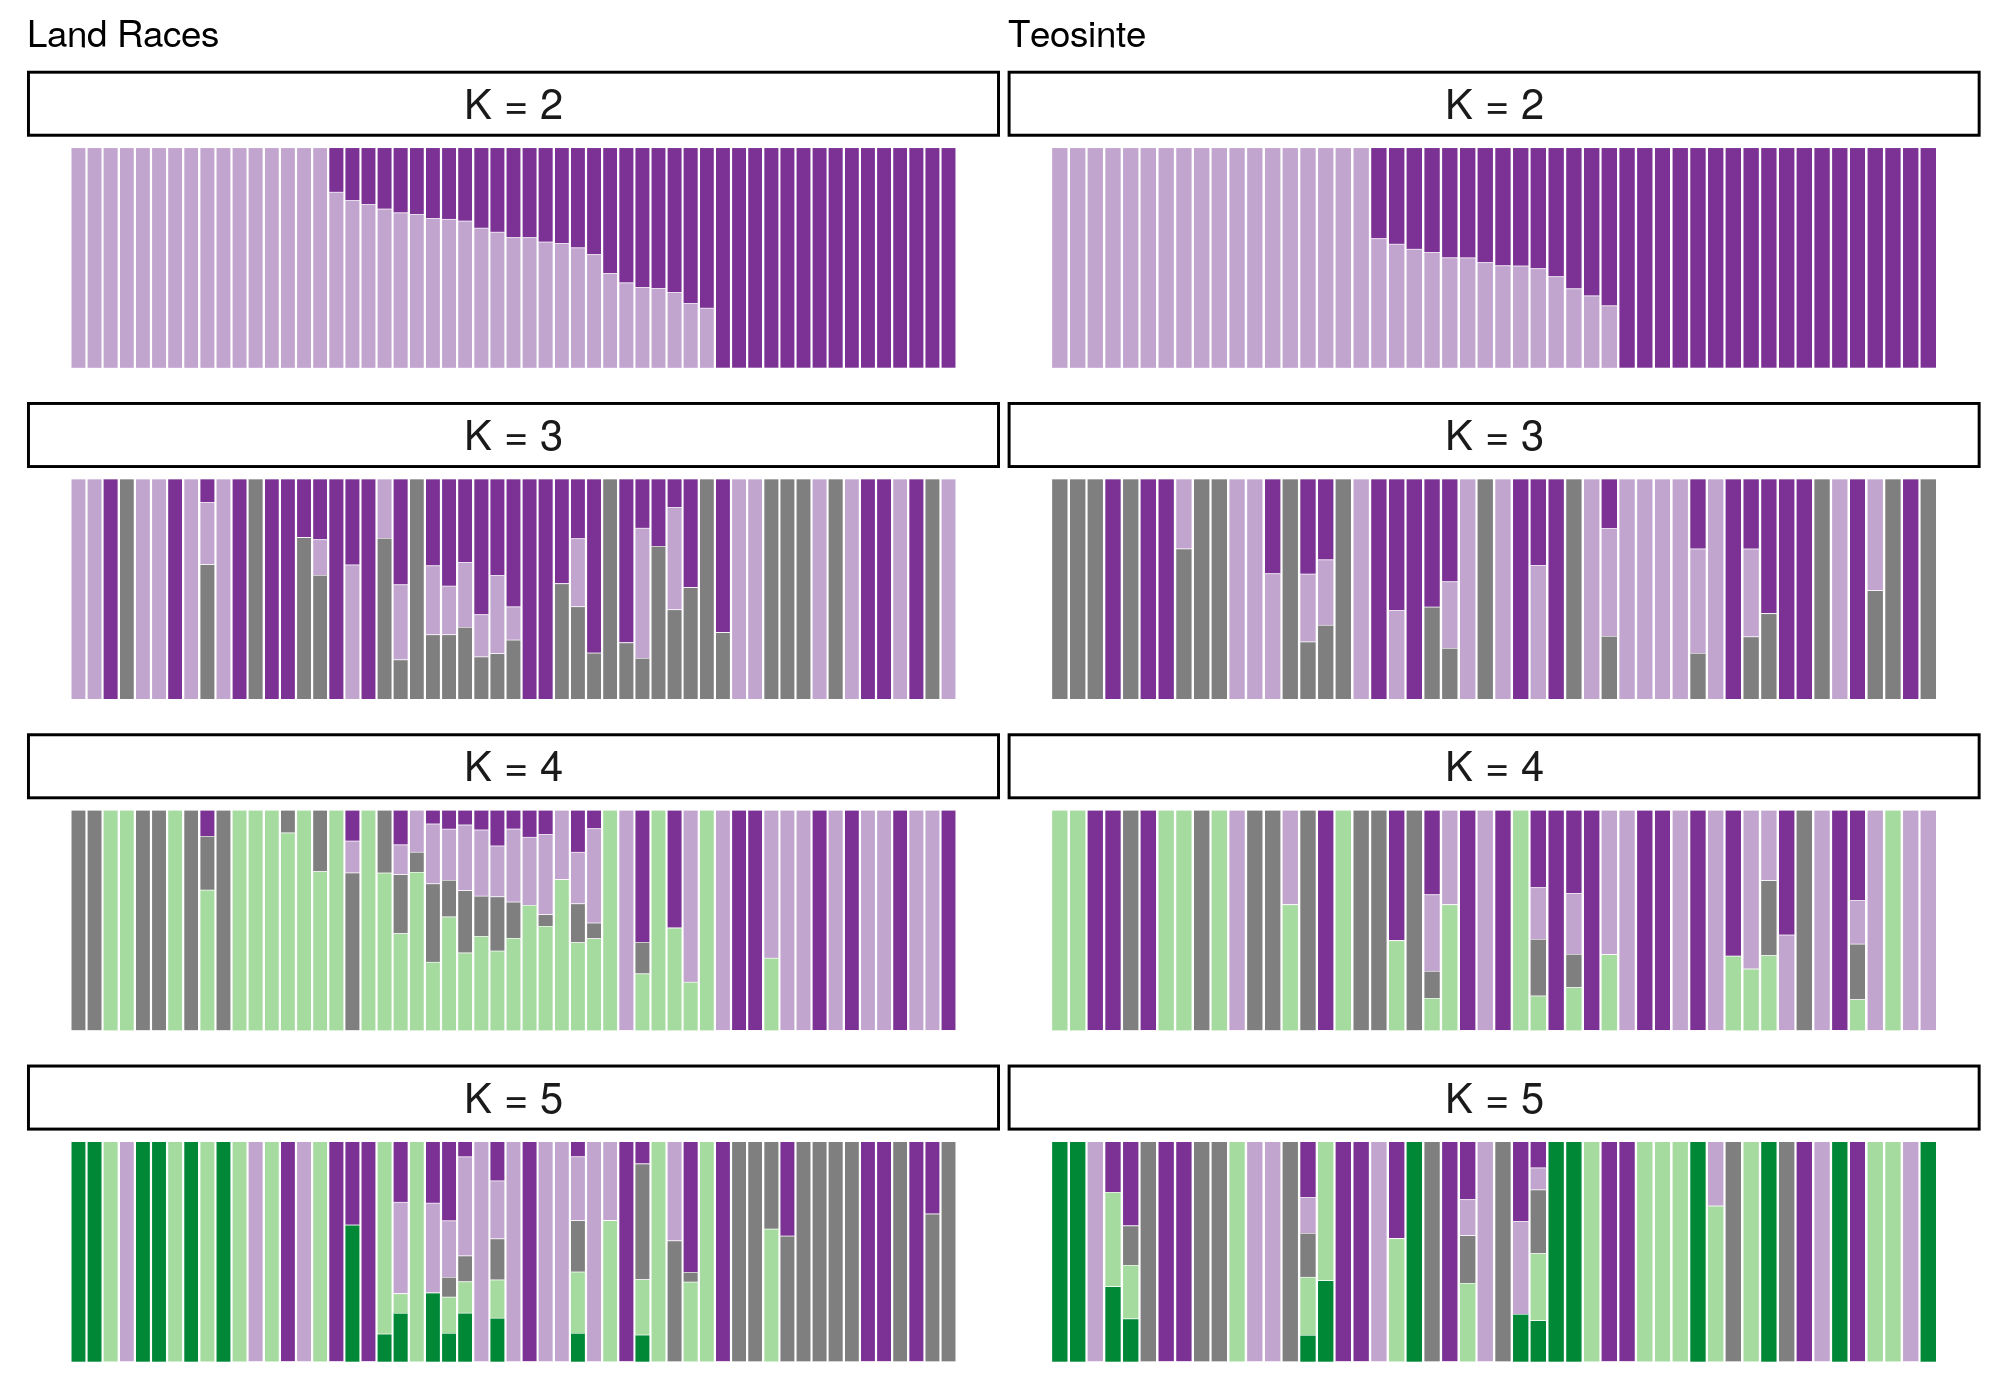

In [47]:
chico_plot <- function(files, k_vec){
    
    row_order <- read_delim(str_glue("../data/ngsAdmix/{chicos[1]}"), delim = " ", col_names = FALSE) %>% 
    mutate(rown = 1:n()) %>% 
    arrange(X1) %>% 
    pull(rown)

    Q <- seq_along(chicos)  %>% 
        map_df(~ {
            read_delim(str_glue("../data/ngsAdmix/{chicos[.x]}"), delim = " ", col_names = FALSE) %>% 
            slice(row_order) %>% 
            mutate(ind = 1:n()) %>% 
            pivot_longer(cols = -ind, names_to = "bin", values_to = "prop") %>% 
            mutate(K = K[.x])
        }) %>% 
        drop_na()

    structure_chicos <- Q %>%
        mutate(K = paste0("K = ", K)) %>%
        ggplot(aes(ind, prop, fill = bin)) +
        geom_bar(position="stack", stat="identity", colour = "white", lwd = 0.1) +
        facet_wrap(~K, scales = "free", ncol = 1) +
        theme_classic() +
        theme(
            strip.text.x = element_text(size = 15),
            legend.position = "n",
            line = element_blank(),
            axis.title.y = element_blank(),
            axis.text.y = element_blank(),
            axis.ticks.y = element_blank(),
            axis.title.x = element_blank(),
            axis.text.x = element_blank(),
            axis.ticks.x = element_blank(),
            plot.margin = margin(0, 0, 0, 0, "cm")
        ) +
        scale_fill_manual(values = c(X1 = "#7b3294", X2 = "#c2a5cf", X3 = "grey50", X4 = "#a6dba0", X5 = "#008837"))

    structure_chicos
}


chicos <- list.files(path = "../data/ngsAdmix/", "v5_LR_([0-9])_thin1M_PalmarChicoONLY.qopt")
K <- str_replace(chicos, "v5_LR_([0-9])_thin1M_PalmarChicoONLY.qopt", "\\1")

LR_chicos <- chico_plot(chicos, K)

chicos <- list.files(path = "../data/ngsAdmix/", "v5_Teo_([0-9])_thin1M_PalmarChicoONLY.qopt")
K <- str_replace(chicos, "v5_Teo_([0-9])_thin1M_PalmarChicoONLY.qopt", "\\1")

Teo_chicos <- chico_plot(chicos, K)


LR_chicos + ggtitle("Land Races") + Teo_chicos + ggtitle("Teosinte")

In [48]:
world <- ne_countries(scale = "medium", returnclass = "sf")
world_points <- st_centroid(world)
world_points <- cbind(world, st_coordinates(st_centroid(world$geometry)))

latlong_df <- 
    tibble(
    population = c("Crucero Lagunitas", "Amatlán de Cañas", "El Rodeo", "Los Guajes", "San Lorenzo", "Palmar Chico"),
    color = c("gold", "cornflowerblue", "darkorange", "mediumaquamarine", "purple", "violetred"),
    Latitude = c(16.98, 20.82, 16.35, 19.23, 19.94, 18.64),
    Longitude = c(-99.28, -104.41, -97.02, -100.49, -103.99, -100.35),
    altitude = c(590, 880, 982, 985, 982, 1008)
    )

pop_map <- ggplot(data = world) +
    geom_sf(fill= "antiquewhite") +
    coord_sf(xlim = c(-106, -91), ylim = c(15, 25), expand = FALSE) +
    scale_x_continuous(breaks = seq(-105, -90, by = 3)) +
    geom_text(mapping = aes(label = "Mexico", -102, 24), size = 6, colour = "black") +
    geom_point(data = latlong_df, mapping = aes(Longitude, Latitude, colour = color), size = 3, lwd = 2, show.legend = FALSE) +
    scale_color_identity() +
    new_scale_color() +
    geom_text(data = latlong_df, mapping = aes(label = population, Longitude, Latitude, colour = altitude), size = 2, fontface = "bold", hjust = -0.2) +
    scale_color_continuous() +
    theme(panel.grid.major = element_line(color = gray(.5), linetype = "dashed", size = 0.5), 
          panel.background = element_rect(fill = "aliceblue"),
          plot.margin = margin(1, 0, 0, 0, "cm")) +
    ylab("") +
    xlab("")

range(latlong_df$Latitude)

Warning message in st_centroid.sf(world):
“st_centroid assumes attributes are constant over geometries of x”
Warning message in st_centroid.sfc(st_geometry(x), of_largest_polygon = of_largest_polygon):
“st_centroid does not give correct centroids for longitude/latitude data”
Warning message in st_centroid.sfc(world$geometry):
“st_centroid does not give correct centroids for longitude/latitude data”
Warning message:
“Duplicated aesthetics after name standardisation: size”


[1] 16.35 20.82

png 
  2

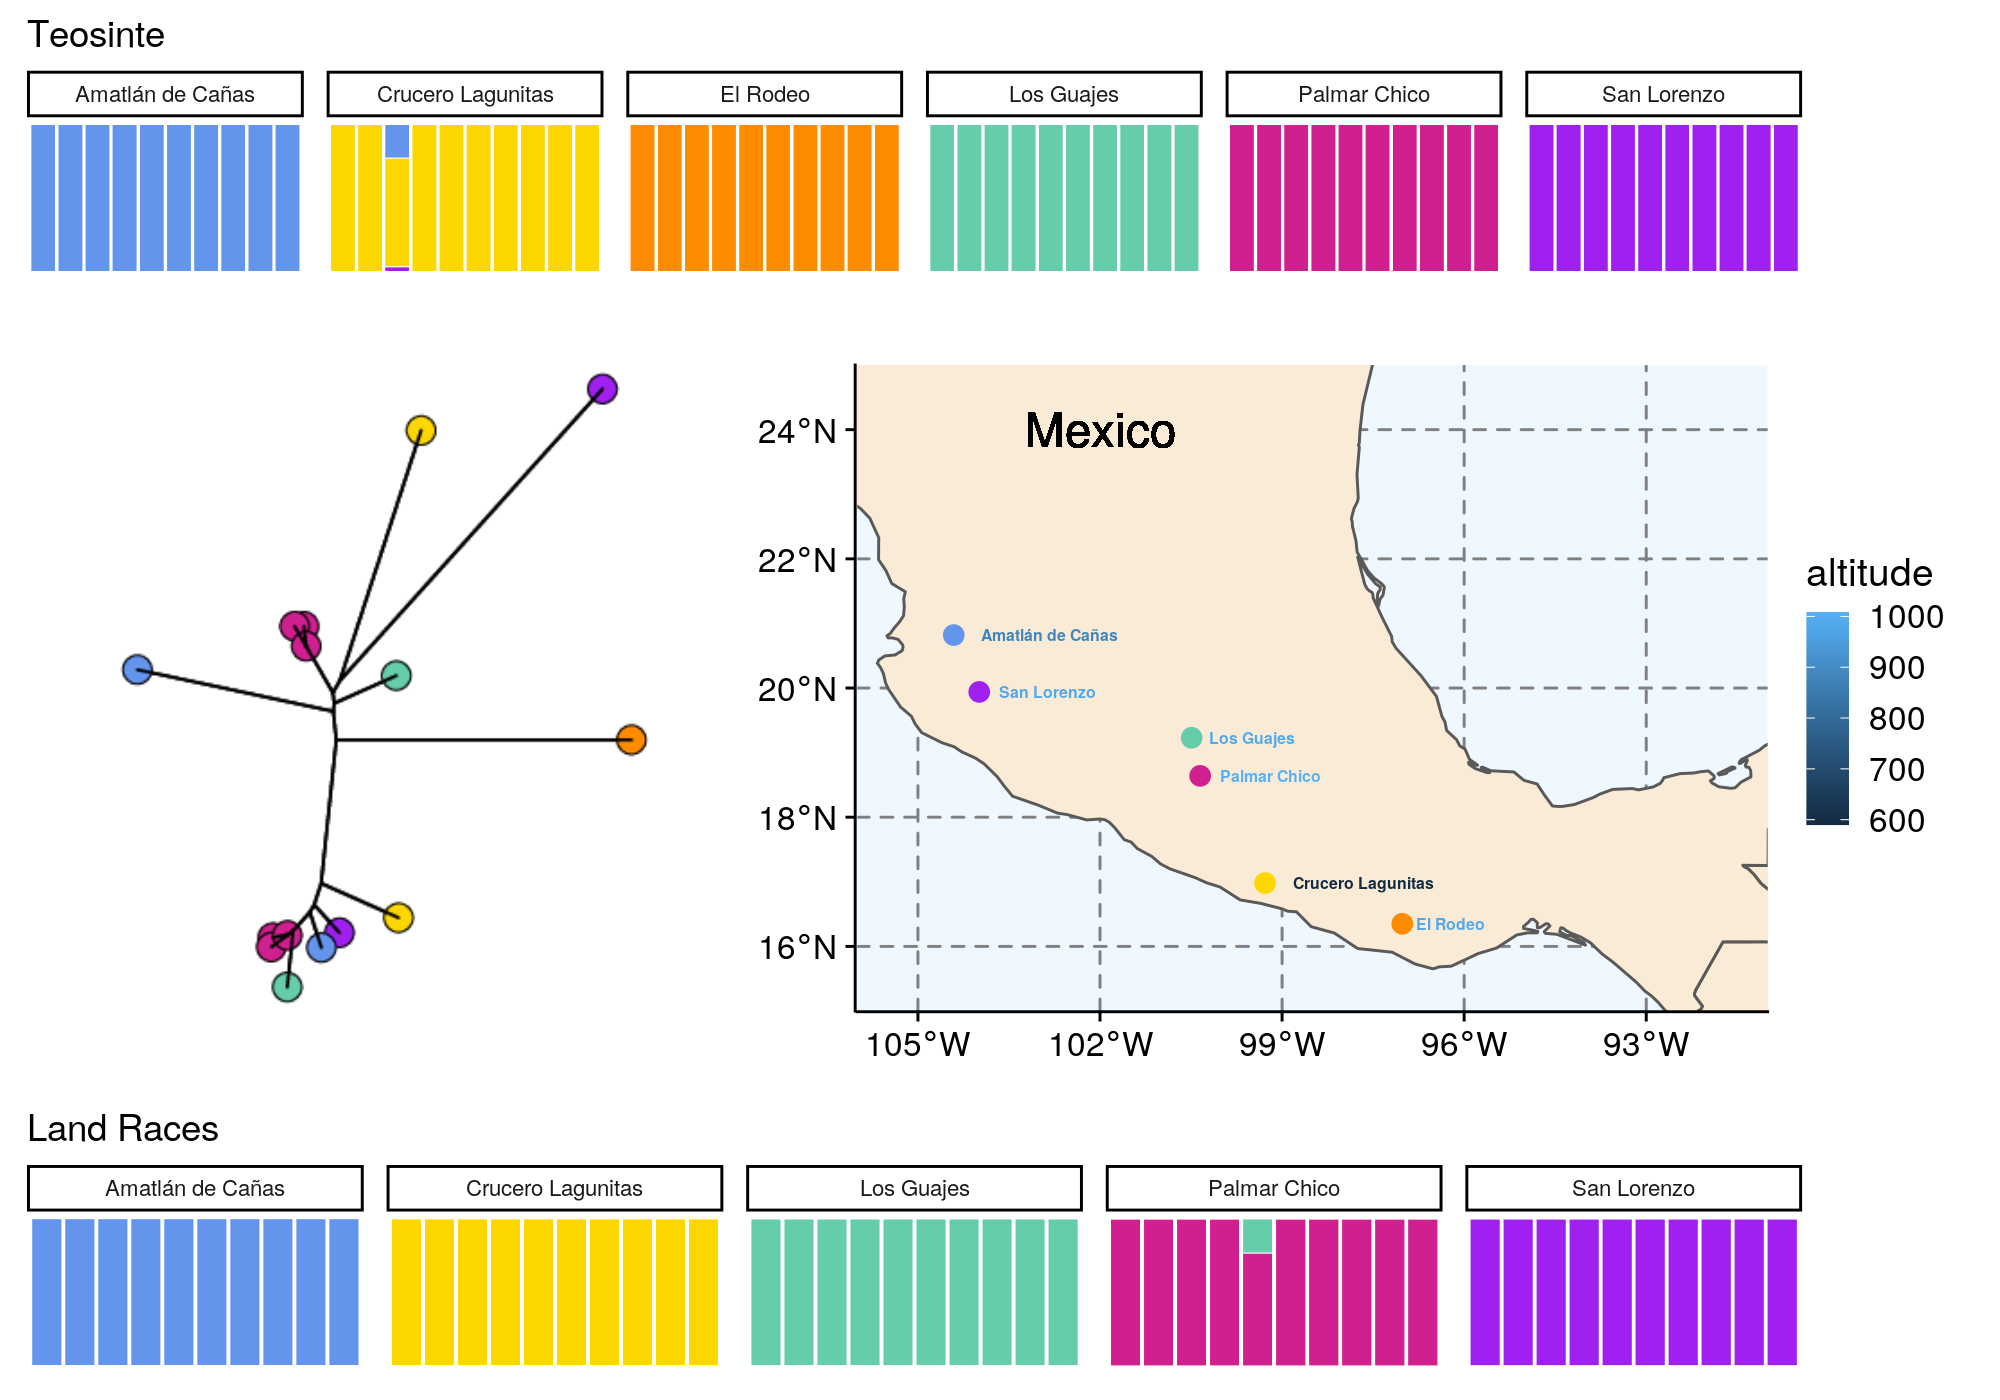

In [56]:
tree_string <- read.tree(text = readLines(gzfile("../data/angsd_treemix/v5_treemix.treeout.gz")))

#png(filename = "../figures/raw_tree.png", res = 300, width = 5, height = 5, units = "in")
pdf("../figures/raw_tree.pdf", width = 5, height = 5)
par(mar = c(0,0,0,0))
plot.phylo(tree_string, type = "unrooted", show.tip.label = FALSE, 
           rotate.tree = 120, edge.width = 2, no.margin = TRUE)
tip_str <- str_replace(tree_string$tip.label, "--", "_")

tiplabels(pch = 21, bg = color_df$color[match(tip_str, color_df$pop)], cex = 3)

#text(0.07,0.0, "Land Races", cex = 2)
#text(0.01,0.1, "Teosinte")

par(new=TRUE)
plot.phylo(tree_string, type = "unrooted", show.tip.label = FALSE, 
           rotate.tree = 120, edge.width = 2, no.margin = TRUE)

legend_df <- color_df %>% 
    mutate(pop = str_replace(pop, pattern = "(LR|Teo)_(.)", "\\2") %>% str_replace("random(1|2)_", "")) %>% 
    distinct() %>% 
    filter(pop != "random")
#legend('right', cex = 1, legend_df$pop, pch = 21, pt.bg = legend_df$color, ncol = 1)
dev.off()


treeplot <- image_ggplot(image_read("../figures/raw_tree.pdf"), interpolate = TRUE)

Teo_structure_10 + ggtitle("Teosinte") + 
(treeplot | pop_map )  +
LR_structure_10 + ggtitle("Land Races") + 
plot_layout(ncol = 1, heights = c(1,4,1)) +
ggsave("../figures/Figure1.pdf", width = 10, height = 7)